# Assignment 01

## Part 01-07

In [101]:
import re

sample_text = """
Visit our site at https://www.example.com for more details. You can also reach us at http://test.org or https://sub.example.net for inquiries.

The event will take place on 12/15/2024. However, it could be rescheduled to 2024-12-16. We are planning for a backup date, 01-01-2025, or maybe 2025/03/20.

We offer products at $100.99, €1500.75, and ¥5000. Another promotion costs just $1,000. You can also get a discount of €99.99 or ¥2000.

For more details, check the <a href="https://example.com">Example Website</a> and <a href="http://test.org">Test Website</a>. We also provide external resources at <a href="https://sub.example.net">Sub Example</a>.

The issue was that teh cat teh dog and I recieve a lot of mail. The problem occured due to some technical difficulties, which is definately going to be fixed.

Addresses like 123 Main St, Apt 4B, 456 Elm Avenue, and 789 Oak Rd Suite 100 are available in our directory.

CSS styles include background-color: #FFAABB; text color: #000; and borders set to #F00.
"""

part_1 = r"(?:https?:\/\/)?(?:www\.)?([a-zA-Z0-9-]+\.[a-zA-Z]{2,})"  
part_2 = r'(\b(?:\d{2}[-/\s]\d{2}[-/\s]\d{4}|\d{4}[-/\s]\d{2}[-/\s]\d{2}|\d{2}[-/\s]\d{2}[-/\s]\d{4})\b)'  
part_3 = r"([€$¥])(\d{1,3}(?:,\d{3})*(?:\.\d{2})?)"  
part_4 = r'<a\s+(?:[^>]*?\s+)?href="([^"]*)"'  
part_5 = r"\b(teh|recieve|occured|definately)\b"  
part_6 = r"(\d{1,5})\s([A-Za-z0-9\s]+(?:\s(?:Apt\s?\d+[A-Za-z]?|Suite\s?\d+))?)"
part_7 = r"#([A-Fa-f0-9]{6}|[A-Fa-f0-9]{3})"  

def extract_matches(regex, text):
    result = re.findall(regex, text)
    return result

matches_part_1 = extract_matches(part_1, sample_text)  
matches_part_2 = extract_matches(part_2, sample_text)  
matches_part_3 = extract_matches(part_3, sample_text)  
matches_part_4 = extract_matches(part_4, sample_text)  
matches_part_5 = extract_matches(part_5, sample_text)  
matches_part_6 = extract_matches(part_6, sample_text)  
matches_part_7 = extract_matches(part_7, sample_text)  

print("Matches for Part 1 (Domain Extraction):", matches_part_1)
print("Matches for Part 2 (Date Extraction):", matches_part_2)
print("Matches for Part 3 (Price Extraction):", matches_part_3)
print("Matches for Part 4 (Hyperlink Extraction):", matches_part_4)
print("Matches for Part 5 (Spelling Mistakes):", matches_part_5)
print("Matches for Part 6 (Street Address Extraction):", matches_part_6)
print("Matches for Part 7 (Hexadecimal Color Codes):", matches_part_7)


Matches for Part 1 (Domain Extraction): ['example.com', 'test.org', 'sub.example', 'example.com', 'test.org', 'sub.example']
Matches for Part 2 (Date Extraction): ['12/15/2024', '2024-12-16', '01-01-2025', '2025/03/20']
Matches for Part 3 (Price Extraction): [('$', '100.99'), ('€', '150'), ('¥', '500'), ('$', '1,000'), ('€', '99.99'), ('¥', '200')]
Matches for Part 4 (Hyperlink Extraction): ['https://example.com', 'http://test.org', 'https://sub.example.net']
Matches for Part 5 (Spelling Mistakes): ['teh', 'teh', 'recieve', 'occured', 'definately']
Matches for Part 6 (Street Address Extraction): [('99', 'or '), ('123', 'Main St'), ('456', 'Elm Avenue'), ('789', 'Oak Rd Suite 100 are available in our directory')]
Matches for Part 7 (Hexadecimal Color Codes): ['FFAABB', '000', 'F00']


# Assignment 02

## Part 01

In [102]:
class SimpleWSD:
    def __init__(self):
        self.lexicon = {
            'apple': ['fruit', 'company'],
        }
        
        self.context_rules = {
            'fruit': ['delicious', 'pie', 'orchard', 'tree', 'sweet', 'eat'],
            'company': ['tech', 'profit', 'stock', 'corporation', 'business', 'CEO', 'market'],
        }

    def disambiguate(self, word, context):
        word = word.lower()
        context = context.lower()

        if word in self.lexicon:
            senses = self.lexicon[word]
            
            for sense in senses:
                for clue in self.context_rules.get(sense, []):
                    if clue in context:
                        return sense
        
        return "unknown"  


context1 = "Apple is a delicious fruit often used in pies."
context2 = "Apple's gross profit increased by 10 percent in FY2024."
context3 = "I like to eat a fresh apple from the orchard every morning."
context4 = "Apple's new technology is transforming the market."

wsd = SimpleWSD()

print("Disambiguated sense (fruit context):", wsd.disambiguate("apple", context1))  
print("Disambiguated sense (company context):", wsd.disambiguate("apple", context2))
print("Disambiguated sense (fruit context - orchard):", wsd.disambiguate("apple", context3)) 
print("Disambiguated sense (company context - tech):", wsd.disambiguate("apple", context4)) 

Disambiguated sense (fruit context): fruit
Disambiguated sense (company context): company
Disambiguated sense (fruit context - orchard): fruit
Disambiguated sense (company context - tech): company


## Part 02

Topic 1: the and a of to in is that br as
Topic 2: i the it this a of was to and you

Sentiment Distribution:
Positive Sentiment: 65
Negative Sentiment: 35


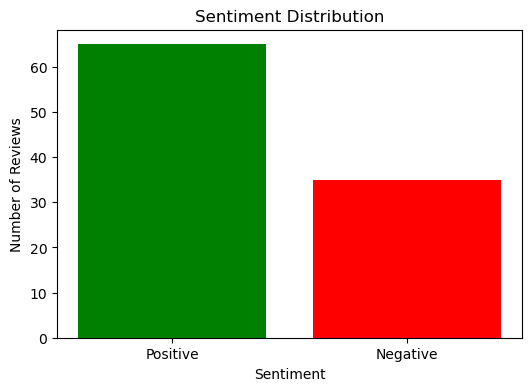

In [4]:
import numpy as np
import re
import pandas as pd

data = pd.read_csv('imdb_reviews.csv')

data = data.sample(frac=1).reset_index(drop=True)

data = data.head(100)

def preprocess_text(doc):
    doc = doc.lower()  
    doc = re.sub(r'[^a-z\s]', '', doc) 
    return doc

documents_cleaned = data['review'].apply(preprocess_text)

vocab = set()
for doc in documents_cleaned:
    vocab.update(doc.split())

vocab = sorted(vocab) 
# Create the Term-Document Matrix (TDM)
def create_term_document_matrix(documents, vocab):
    matrix = np.zeros((len(documents), len(vocab)))  
    for i, doc in enumerate(documents):
        words = doc.split()
        for word in words:
            if word in vocab:
                matrix[i, vocab.index(word)] += 1  
    return matrix

X = create_term_document_matrix(documents_cleaned, vocab)

# Apply Non-Negative Matrix Factorization (NMF) to extract topics
def nmf(X, n_components=2, max_iter=500, tol=1e-4):
    n_documents, n_terms = X.shape
    W = np.random.rand(n_documents, n_components) 
    H = np.random.rand(n_components, n_terms) 
    
    for _ in range(max_iter):
        H_new = H * np.dot(W.T, X) / (np.dot(W.T, np.dot(W, H)) + 1e-10)
        W_new = W * np.dot(X, H_new.T) / (np.dot(W, np.dot(H_new, H_new.T)) + 1e-10)
        
        if np.linalg.norm(W_new - W) < tol and np.linalg.norm(H_new - H) < tol:
            break
        
        W, H = W_new, H_new
        
    return W, H

W, H = nmf(X, n_components=2)

def display_top_words(H, vocab, n_words=10):
    for topic_idx, topic in enumerate(H):
        top_words_idx = topic.argsort()[:-n_words - 1:-1]
        top_words = [vocab[i] for i in top_words_idx]
        print(f"Topic {topic_idx + 1}: {' '.join(top_words)}")

display_top_words(H, vocab)

def assign_sentiment(W):
    document_sentiments = []
    for doc_idx in range(W.shape[0]):
        if W[doc_idx, 0] > W[doc_idx, 1]:
            sentiment = 'positive'
        else:
            sentiment = 'negative'
        document_sentiments.append(sentiment)
    return document_sentiments

sentiments = assign_sentiment(W)


ground_truth = data['sentiment'].tolist() 




import matplotlib.pyplot as plt

def visualize_sentiment(sentiments):
    # Count sentiment occurrences
    positive_count = sentiments.count('positive')
    negative_count = sentiments.count('negative')
    
    # Display sentiment distribution
    print("\nSentiment Distribution:")
    print(f"Positive Sentiment: {positive_count}")
    print(f"Negative Sentiment: {negative_count}")
    
    # Create a bar plot for sentiment visualization
    labels = ['Positive', 'Negative']
    counts = [positive_count, negative_count]
    
    plt.figure(figsize=(6, 4))
    plt.bar(labels, counts, color=['green', 'red'])
    plt.title('Sentiment Distribution')
    plt.ylabel('Number of Reviews')
    plt.xlabel('Sentiment')
    plt.show()

visualize_sentiment(sentiments)


## Part 03

In [104]:
import numpy as np

def accuracy(ground_truth, predicted):
    correct = sum([1 for gt, pred in zip(ground_truth, predicted) if gt == pred])
    total = len(ground_truth)
    return correct / total

def precision_and_recall(ground_truth, predicted):
    # True Positives, False Positives, False Negatives
    TP = sum([1 for gt, pred in zip(ground_truth, predicted) if gt == pred == "positive"])
    FP = sum([1 for gt, pred in zip(ground_truth, predicted) if gt != pred and pred == "positive"])
    FN = sum([1 for gt, pred in zip(ground_truth, predicted) if gt != pred and gt == "positive"])
    TN = sum([1 for gt, pred in zip(ground_truth, predicted) if gt == pred == "negative"])

    # Calculate precision and recall
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0

    return precision, recall, TP, FP, FN, TN

acc = accuracy(ground_truth, sentiments)
precision, recall, TP, FP, FN, TN = precision_and_recall(ground_truth, sentiments)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"True Positives: {TP}, False Positives: {FP}, False Negatives: {FN}, True Negatives: {TN}")


Accuracy: 0.5200
Precision: 0.4821
Recall: 0.5238
True Positives: 121, False Positives: 130, False Negatives: 110, True Negatives: 139


# Assignmen 03

## Part 01

In [105]:
import re

def segment_sentences(paragraph):
    sentence_endings = r'(?<=[.!?])\s+|\n+' # ?<= Look a head so that . is included with sentence
    sentences = re.split(sentence_endings, paragraph.strip())
    return [sentence.strip() for sentence in sentences if sentence.strip()]

text_samples = [
    "Hello! How are you today? I hope you are doing well. This is a test.",
    "This is the first sentence. This is the second. Is it working? Yes, it is!",
    "Python is great. I love programming. Do you?",
    "Hello there! How are you today? I hope you're doing well. Let's meet later in the evening.It's been a while, hasn't it? I wonder if she will come to the party. It's going to be fun.",
    '''
    HI
    Hello 
    
    My name is John Doe. I'm a software engineer. I live in New York City.

    I recently graduated from Harvard University with a degree in Computer Science.

    I'm currently working as a software engineer at a startup called ABC Corp.
    '''
]

for text in text_samples:
    print("Original Paragraph:")
    print(text)
    print("Segmented Sentences:")
    for sentence in segment_sentences(text):
        print(f" - {sentence}")
    print("\n" + "="*50 + "\n")


Original Paragraph:
Hello! How are you today? I hope you are doing well. This is a test.
Segmented Sentences:
 - Hello!
 - How are you today?
 - I hope you are doing well.
 - This is a test.


Original Paragraph:
This is the first sentence. This is the second. Is it working? Yes, it is!
Segmented Sentences:
 - This is the first sentence.
 - This is the second.
 - Is it working?
 - Yes, it is!


Original Paragraph:
Python is great. I love programming. Do you?
Segmented Sentences:
 - Python is great.
 - I love programming.
 - Do you?


Original Paragraph:
Hello there! How are you today? I hope you're doing well. Let's meet later in the evening.It's been a while, hasn't it? I wonder if she will come to the party. It's going to be fun.
Segmented Sentences:
 - Hello there!
 - How are you today?
 - I hope you're doing well.
 - Let's meet later in the evening.It's been a while, hasn't it?
 - I wonder if she will come to the party.
 - It's going to be fun.


Original Paragraph:

    HI
    Hel

## Part 02

In [106]:
import re
from fuzzywuzzy import fuzz
from sklearn.metrics import precision_score, recall_score, f1_score
from datasets import load_dataset
from transformers import DistilBertTokenizer, DistilBertForTokenClassification

def calculate_fuzzy_tp_fp_fn_tn(ground_truth, segmented_sentences, threshold=80):
    true_positives = 0
    false_positives = 0
    false_negatives = 0
    true_negatives = 0  
    
    matched_ground_truth = set()  
    for gt_sentence in ground_truth:
        matched = False
        for seg_sentence in segmented_sentences:
            if fuzz.partial_ratio(gt_sentence, seg_sentence) >= threshold:
                true_positives += 1
                matched = True
                matched_ground_truth.add(gt_sentence)  
                break  

        if not matched:
            false_negatives += 1 

    for seg_sentence in segmented_sentences:
        if seg_sentence not in matched_ground_truth:
            false_positives += 1 

    total_sentences = len(ground_truth) + len(segmented_sentences)
    true_negatives = total_sentences - (true_positives + false_positives + false_negatives)

    return true_positives, false_positives, false_negatives, true_negatives

def calculate_metrics(tp, fp, fn, tn):
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    return precision, recall, f1


tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertForTokenClassification.from_pretrained("distilbert-base-uncased")
dataset = load_dataset("cnn_dailymail", "3.0.0", split="train[:1%]")
sample_text = dataset[0]['article']

segmented_sentences = segment_sentences(sample_text)

ground_truth = [
    "London, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won't cast a spell on him.",
    "Daniel Radcliffe as Harry Potter in 'Harry Potter and the Order of the Phoenix' To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties.",
    "I don't plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar.",
    "I don't think I'll be particularly extravagant.",
    "The things I like buying are things that cost about 10 pounds -- books and CDs and DVDs.",
    "At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film 'Hostel: Part II,' currently six places below his number one movie on the UK box office chart.",
    "Details of how he'll mark his landmark birthday are under wraps."
]

tp, fp, fn, tn = calculate_fuzzy_tp_fp_fn_tn(ground_truth, segmented_sentences, threshold=80)

precision, recall, f1 = calculate_metrics(tp, fp, fn, tn)

def calculate_fuzzy_accuracy(ground_truth, segmented_sentences, threshold=80):
    correct_matches = 0
    for gt_sentence in ground_truth:
        for seg_sentence in segmented_sentences:
            if fuzz.partial_ratio(gt_sentence, seg_sentence) >= threshold:
                correct_matches += 1
                break 

    accuracy = correct_matches / len(ground_truth) if len(ground_truth) > 0 else 0
    return accuracy

accuracy = calculate_fuzzy_accuracy(ground_truth, segmented_sentences)

print(f"Fuzzy Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nGround Truth Sentences:")
for sentence in ground_truth:
    print(f"- {sentence}")

print("\nSegmented Sentences:")
for sentence in segmented_sentences:
    print(f"- {sentence}")


Some weights of DistilBertForTokenClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Fuzzy Accuracy: 1.0000
Precision: 0.2692
Recall: 1.0000
F1 Score: 0.4242

Ground Truth Sentences:
- London, England (Reuters) -- Harry Potter star Daniel Radcliffe gains access to a reported £20 million ($41.1 million) fortune as he turns 18 on Monday, but he insists the money won't cast a spell on him.
- Daniel Radcliffe as Harry Potter in 'Harry Potter and the Order of the Phoenix' To the disappointment of gossip columnists around the world, the young actor says he has no plans to fritter his cash away on fast cars, drink and celebrity parties.
- I don't plan to be one of those people who, as soon as they turn 18, suddenly buy themselves a massive sports car collection or something similar.
- I don't think I'll be particularly extravagant.
- The things I like buying are things that cost about 10 pounds -- books and CDs and DVDs.
- At 18, Radcliffe will be able to gamble in a casino, buy a drink in a pub or see the horror film 'Hostel: Part II,' currently six places below his number o

## Part 03

In [107]:
import spacy
import re
import json


nlp_medical = spacy.load("en_ner_bc5cdr_md")  
nlp_personal = spacy.load("en_core_web_md")  

def extract_medical_entities(text):
    """
    This function uses scispacy's NER capabilities to extract medical entities like diseases, symptoms, medications, etc.
    """
    
    doc = nlp_medical(text)
    
    entities = {
        "patient_info": {},
        "diagnoses": [],
        "symptoms": [],
        "medications": [],
        "lab_results": [],
        "contact": None,
        "date_of_birth": None,
        "age": None,
        "gender": None
    }
    
    
    for ent in doc.ents:
        
        if ent.label_ in ["DISEASE", "MEDICAL_CONDITION"]:
            entities["diagnoses"].append(ent.text)
        
        
        if ent.label_ == "SYMPTOM":
            entities["symptoms"].append(ent.text)
        
        
        if ent.label_ == "MEDICATION":
            entities["medications"].append(ent.text)
    
    
    lab_results = re.findall(r"(\b[\w\s]+):\s?(\d+/?\d+|\d+)", text)  
    if lab_results:
        for result in lab_results:
            entities["lab_results"].append({result[0]: result[1]})
    
    return entities


def extract_personal_entities(text):
    """
    This function uses the spaCy personal NER model to extract personal information like name, age, DOB, contact.
    """
    
    doc = nlp_personal(text)
    
    personal_info = {
        "patient_info": {},
        "contact": None,
        "date_of_birth": None,
        "age": None,
        "gender": None
    }
    
    
    for ent in doc.ents:
        
        if ent.label_ == "PERSON" and not personal_info["patient_info"].get("name"):
            personal_info["patient_info"]["name"] = ent.text
            
        
        if ent.label_ == "AGE" and not personal_info["age"]:
            personal_info["age"] = ent.text
            
        
        if ent.label_ == "DATE" and not personal_info["date_of_birth"]:
            personal_info["date_of_birth"] = ent.text
        
        
        if ent.label_ == "GENDER" and not personal_info["gender"]:
            personal_info["gender"] = ent.text
    
    
    phone_match = re.search(r"(\+?\d{1,2}\s?)?(\(?\d{3}\)?[\s\-]?\d{3}[\s\-]?\d{4})", text)
    if phone_match:
        personal_info["contact"] = phone_match.group(0)
    
    return personal_info


def extract_data_from_clinical_notes(text):
    """
    This function processes the clinical notes and extracts both medical and personal entities.
    It returns a JSON object containing the extracted entities for both medical and personal information.
    """
    
    if isinstance(text, str):
        text = [text]
    
    extracted_data = []
    
    for note in text:
        medical_entities = extract_medical_entities(note)
        personal_entities = extract_personal_entities(note)
        
        
        combined_entities = {**medical_entities, **personal_entities}
        extracted_data.append(combined_entities)
    
    
    return json.dumps(extracted_data, indent=4)



text = """
John Doe, a 45-year-old male with a history of hypertension, presents with complaints of severe headache and dizziness.
He was diagnosed with Type 2 Diabetes during a previous visit. His BP was 150/90 mmHg, and he was prescribed Metformin 500mg daily.
Follow-up in two weeks. Contact: 555-123-4567. DOB: 05/02/1979.
"""


data = extract_data_from_clinical_notes(text)


print(data)


[
    {
        "patient_info": {
            "name": "John Doe"
        },
        "diagnoses": [
            "hypertension",
            "complaints of severe",
            "headache",
            "dizziness",
            "Diabetes"
        ],
        "symptoms": [],
        "medications": [],
        "lab_results": [
            {
                "Contact": "555"
            },
            {
                "DOB": "05/02"
            }
        ],
        "contact": "555-123-4567",
        "date_of_birth": "45-year-old",
        "age": null,
        "gender": null
    }
]


# Assignment 04 (Edit Distance)

## Part 01

In [108]:
def levenshtein_distance(str1, str2,substitution_cost=1,insertion_cost=1,deletion_cost=1):
    m, n = len(str1), len(str2)
    
    
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    
    for i in range(m + 1):
        dp[i][0] = i  
    for j in range(n + 1):
        dp[0][j] = j  

    
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if str1[i - 1] == str2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]  
            else:
                dp[i][j] = min(
                    dp[i - 1][j] + deletion_cost,    
                    dp[i][j - 1] + insertion_cost,    
                    dp[i - 1][j - 1] + substitution_cost
                )
    
    return dp[m][n]


str2 = "kitten"
str1 = "kittena"
print("Minimum Edit Distance:", levenshtein_distance(str1, str2))

Minimum Edit Distance: 1


## Part 02

In [109]:

def levenshtein_traceback(str1, str2):
    m, n = len(str1), len(str2)
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    
    for i in range(m + 1):
        dp[i][0] = i
    for j in range(n + 1):
        dp[0][j] = j

    
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if str1[i - 1] == str2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]
            else:
                dp[i][j] = min(
                    dp[i - 1][j] + 1,    
                    dp[i][j - 1] + 1,    
                    dp[i - 1][j - 1] + 1 
                )

    
    i, j = m, n
    operations = []
    
    while i > 0 or j > 0:
        if i > 0 and j > 0 and str1[i - 1] == str2[j - 1]:
            i -= 1
            j -= 1
        elif i > 0 and j > 0 and dp[i][j] == dp[i - 1][j - 1] + 1:
            operations.append(f"Substitute '{str1[i - 1]}' with '{str2[j - 1]}'")
            i -= 1
            j -= 1
        elif i > 0 and dp[i][j] == dp[i - 1][j] + 1:
            operations.append(f"Delete '{str1[i - 1]}'")
            i -= 1
        elif j > 0 and dp[i][j] == dp[i][j - 1] + 1:
            operations.append(f"Insert '{str2[j - 1]}'")
            j -= 1

    operations.reverse()
    return dp[m][n], operations


str1 = "kitten"
str2 = "sitting"


distance, operations = levenshtein_traceback(str1, str2)
print("\nMinimum Edit Distance:", distance)
print("Operations:")
for op in operations:
    print(op)



Minimum Edit Distance: 3
Operations:
Substitute 'k' with 's'
Substitute 'e' with 'i'
Insert 'g'


## Part 03      

In [110]:
def print_edit_distance_table_with_arrows(str1, str2):
    m, n = len(str1), len(str2)
    dp = [[0] * (n + 1) for _ in range(m + 1)]
    directions = [[""] * (n + 1) for _ in range(m + 1)]

    
    for i in range(m + 1):
        dp[i][0] = i
        if i > 0:
            directions[i][0] = "↑"
    for j in range(n + 1):
        dp[0][j] = j
        if j > 0:
            directions[0][j] = "←"

    
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if str1[i - 1] == str2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]
                directions[i][j] = "↖"
            else:
                delete = dp[i - 1][j] + 1
                insert = dp[i][j - 1] + 1
                substitute = dp[i - 1][j - 1] + 1

                dp[i][j] = min(delete, insert, substitute)

                
                if dp[i][j] == delete:
                    directions[i][j] = "↑"
                elif dp[i][j] == insert:
                    directions[i][j] = "←"
                else:
                    directions[i][j] = "↖"

    
    print("Edit Distance Table with Backtracking Arrows:")
    print("    ", end="")
    for char in " " + str2:
        print(f"{char:4}", end="")
    print()
    
    for i in range(m + 1):
        if i == 0:
            print("   ", end=" ")
        else:
            print(f"{str1[i - 1]:3}", end=" ")
        
        for j in range(n + 1):
            arrow = directions[i][j]
            print(f"{dp[i][j]:2}{arrow:2}", end=" ")
        print()

print_edit_distance_table_with_arrows(str1, str2)

Edit Distance Table with Backtracking Arrows:
        s   i   t   t   i   n   g   
     0    1←   2←   3←   4←   5←   6←   7←  
k    1↑   1↖   2←   3←   4←   5←   6←   7←  
i    2↑   2↑   1↖   2←   3←   4↖   5←   6←  
t    3↑   3↑   2↑   1↖   2↖   3←   4←   5←  
t    4↑   4↑   3↑   2↖   1↖   2←   3←   4←  
e    5↑   5↑   4↑   3↑   2↑   2↖   3←   4←  
n    6↑   6↑   5↑   4↑   3↑   3↑   2↖   3←  


## Part 04  

In [111]:
def weighted_edit_distance(str1, str2, cost_insert=1, cost_delete=1, cost_substitute=1):
    m, n = len(str1), len(str2)
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(m + 1):
        dp[i][0] = i * cost_delete
    for j in range(n + 1):
        dp[0][j] = j * cost_insert

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if str1[i - 1] == str2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1]
            else:
                dp[i][j] = min(
                    dp[i - 1][j] + cost_delete,
                    dp[i][j - 1] + cost_insert,
                    dp[i - 1][j - 1] + cost_substitute
                )

    return dp[m][n]


print(weighted_edit_distance("INTENTION", "EXECUTION", cost_insert=1, cost_delete=1, cost_substitute=2))


8


## Part 05

In [112]:
def soundex(word):
    
    word = word.upper()

    
    first_letter = word[0]

    
    mappings = {
        "BFPV": "1",
        "CGJKQSXZ": "2",
        "DT": "3",
        "L": "4",
        "MN": "5",
        "R": "6"
    }

    
    def get_digit(character):
        for key in mappings.keys():
            if character in key:
                return mappings[key]
        return ""

    
    soundex_code = first_letter
    previous_digit = None

    for char in word[1:]:
        digit = get_digit(char)
        if digit != previous_digit:
            soundex_code += digit
        previous_digit = digit

    
    soundex_code = soundex_code.replace("A", "").replace("E", "").replace("I", "").replace("O", "").replace("U", "")
    soundex_code = soundex_code.replace("H", "").replace("W", "")

    
    soundex_code = (soundex_code + "0000")[:4]

    return soundex_code

def phonetic_match(str1, str2):
    return soundex(str1) == soundex(str2)


names = [
    ("Ahmad", "Ahmed"),
    ("Ayesha", "Aisha"),
    ("Rafiq", "Rafique"),
    ("Zain", "Zayn"),
    ("Naveed", "Naveid"),
    ("Subhan", "Suban"),
    ("Subhan", "zubhan"),
    ("Rayan", "Rian"),
]

for name1, name2 in names:
    print(f"Soundex of '{name1}': {soundex(name1)}")
    print(f"Soundex of '{name2}': {soundex(name2)}")
    print(f"Do they phonetically match? {phonetic_match(name1, name2)}")
    print("-" * 32)


Soundex of 'Ahmad': 5300
Soundex of 'Ahmed': 5300
Do they phonetically match? True
--------------------------------
Soundex of 'Ayesha': 2000
Soundex of 'Aisha': 2000
Do they phonetically match? True
--------------------------------
Soundex of 'Rafiq': R120
Soundex of 'Rafique': R120
Do they phonetically match? True
--------------------------------
Soundex of 'Zain': Z500
Soundex of 'Zayn': Z500
Do they phonetically match? True
--------------------------------
Soundex of 'Naveed': N130
Soundex of 'Naveid': N130
Do they phonetically match? True
--------------------------------
Soundex of 'Subhan': S150
Soundex of 'Suban': S150
Do they phonetically match? True
--------------------------------
Soundex of 'Subhan': S150
Soundex of 'zubhan': Z150
Do they phonetically match? False
--------------------------------
Soundex of 'Rayan': R500
Soundex of 'Rian': R500
Do they phonetically match? True
--------------------------------


# Assignment 04 (Sequence Alignment)

## Part 01

In [113]:
def needleman_wunsch(str1, str2, gap_penalty=-2, match_score=1, mismatch_penalty=-1):
    m, n = len(str1), len(str2)
    dp = [[0] * (n + 1) for _ in range(m + 1)]
    directions = [[""] * (n + 1) for _ in range(m + 1)]

    
    for i in range(m + 1):
        dp[i][0] = i * gap_penalty
        directions[i][0] = "↑"
    for j in range(n + 1):
        dp[0][j] = j * gap_penalty
        directions[0][j] = "←"
    
    directions[0][0] = " "

    
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            match = dp[i - 1][j - 1] + (match_score if str1[i - 1] == str2[j - 1] else mismatch_penalty)
            delete = dp[i - 1][j] + gap_penalty
            insert = dp[i][j - 1] + gap_penalty

            
            if match >= delete and match >= insert:
                dp[i][j] = match
                directions[i][j] = "↖"
            elif delete > match and delete >= insert:
                dp[i][j] = delete
                directions[i][j] = "↑"
            else:
                dp[i][j] = insert
                directions[i][j] = "←"

    
    print("Scoring Table with Backtracking Arrows:")

    
    i, j = m, n
    align1, align2 = "", ""

    while i > 0 and j > 0:
        if directions[i][j] == "↖":
            align1 += str1[i - 1]
            align2 += str2[j - 1]
            i -= 1
            j -= 1
        elif directions[i][j] == "↑":
            align1 += str1[i - 1]
            align2 += "-"
            i -= 1
        elif directions[i][j] == "←":
            align1 += "-"
            align2 += str2[j - 1]
            j -= 1

    
    while i > 0:
        align1 += str1[i - 1]
        align2 += "-"
        i -= 1
    while j > 0:
        align1 += "-"
        align2 += str2[j - 1]
        j -= 1

    
    print("\nOptimal Alignment:")
    print(align1[::-1])
    print(align2[::-1])
    return dp[m][n],dp,directions


str1="AATCG"
str2="AACG"
cost,dp,directions=needleman_wunsch(str1,str2)
print("Cost:",cost)


Scoring Table with Backtracking Arrows:

Optimal Alignment:
AATCG
AA-CG
Cost: 2


## Part 02

In [114]:
def print_table_with_arrows(dp, directions, str1, str2):
    
    print("    ", end="")
    for char in " " + str2:
        print(f"{char:6}", end="")
    print()

    for i, row in enumerate(dp):
        if i == 0:
            print(" ", end="  ")
        else:
            print(str1[i - 1], end="  ")
        for j, val in enumerate(row):
            arrow = directions[i][j]
            print(f"{val:3}{arrow:3}", end="")
        print()
        
print_table_with_arrows(dp, directions, str1, str2)


          A     A     C     G     
     0    -2←   -4←   -6←   -8←  
A   -2↑    1↖   -1↖   -3←   -5←  
A   -4↑   -1↖    2↖    0←   -2←  
T   -6↑   -3↑    0↑    1↖   -1↖  
C   -8↑   -5↑   -2↑    1↖    0↖  
G  -10↑   -7↑   -4↑   -1↑    2↖  
